# Práctico 1

## Librerías

<img src="https://numpy.org/images/content_images/ds-landscape.png" width=600 alt='Image from numpy website.'>

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
#from google.colab import drive, files
import io

In [7]:
import files

ModuleNotFoundError: No module named 'files'

## Carga y preparación de los datos

In [3]:
# Carga de los datos (desde drive)
#drive.mount('/content/drive', force_remount=True)

df=pd.read_csv("practico1/credit_data.csv", sep = ",")

In [17]:
# Otra forma de carga de datos (desde local)
#uploaded = files.upload()

In [4]:
# Comando desde consola para ver que tengo en esta sesión
!dir

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: CC95-2060

 Directorio de c:\Users\crist\Documents\GitHub\ML

03/09/2022  23:13    <DIR>          .
03/09/2022  23:13    <DIR>          ..
03/09/2022  22:53    <DIR>          .vscode
03/09/2022  23:13           647.934 practica.ipynb
03/09/2022  22:30    <DIR>          practico1
03/09/2022  22:30    <DIR>          practico2
03/09/2022  22:41            23.721 Pr�ctico_1.ipynb
               2 archivos        671.655 bytes
               5 dirs  451.548.020.736 bytes libres


In [9]:
#df2 = pd.read_csv(io.BytesIO(uploaded['credit_data.csv']))

NameError: name 'uploaded' is not defined

In [18]:
#df2 = pd.read_csv(io.BytesIO('credit_data.csv'))

In [5]:
# Tipo de objeto creado
type(df)

pandas.core.frame.DataFrame

In [6]:
# Número de filas en el data frame
len(df)

1000

In [14]:
# Número de filas y columnas en el data frame
df.shape

(1000, 10)

In [7]:
# Visualización del data frame
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good
1,22,female,1,own,little,moderate,5951,48,domestic appliances,bad
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good
3,45,male,1,for free,little,little,7882,42,radio/television,good
4,53,male,1,for free,little,little,4870,24,car (new),bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,3,own,little,NaN,1736,12,radio/television,good
996,40,male,0,own,little,little,3857,30,car (used),good
997,38,male,1,own,little,NaN,804,12,domestic appliances,good
998,23,male,1,for free,little,little,1845,45,domestic appliances,bad


In [8]:
# Primeras filas del data frame
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good
1,22,female,1,own,little,moderate,5951,48,domestic appliances,bad
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good
3,45,male,1,for free,little,little,7882,42,radio/television,good
4,53,male,1,for free,little,little,4870,24,car (new),bad


In [ ]:
# Ultimas filas del data frame
df.tail(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
997,38,male,1,own,little,NaN,804,12,domestic appliances,good
998,23,male,1,for free,little,little,1845,45,domestic appliances,bad
999,27,male,1,own,moderate,moderate,4576,45,car (used),good


In [ ]:
# Selección de filas con index 2, 3 y 4
df.iloc[2:4]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good
3,45,male,1,for free,little,little,7882,42,radio/television,good
4,53,male,1,for free,little,little,4870,24,car (new),bad


In [ ]:
# Seleccion de filas con identificador 42,43,44, y 45
df.loc[42:45]

In [ ]:
# Selección de filas con index par, lambda expression
df.loc[lambda x: x.index % 2 == 0]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good
4,53,male,1,for free,little,little,4870,24,car (new),bad
6,53,male,1,own,quite rich,NaN,2835,24,radio/television,good
8,61,male,3,own,rich,NaN,3059,12,domestic appliances,good
...,...,...,...,...,...,...,...,...,...,...
990,37,male,3,own,NaN,NaN,3565,12,(vacation - does not exist?),good
992,23,male,3,rent,NaN,little,1936,18,domestic appliances,good
994,50,male,1,own,NaN,NaN,2390,12,car (new),good
996,40,male,0,own,little,little,3857,30,car (used),good


In [ ]:
# Selección de columnas por el nombre
df[['Age','Risk']].

,Age,Risk
0,67,good
1,22,bad
2,49,good
3,45,good
4,53,bad
...,...,...
995,31,good
996,40,good
997,38,good
998,23,bad


In [ ]:
# Identificamos las variables del data frame y sus caracteristicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
# Porcentaje de valores nulos
df.isnull().mean()

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

In [ ]:
# En este caso, nos interesa mantenerlos, pero podríamos:

# Reemplazar valores nulos númericos
##df['Age'] = df['Age'].fillna(df['Age'].mean())

# Reemplazar valores nulos categóricos
##df['Saving accounts'] = df['Saving accounts'].fillna(value="nuevo valor")

# Eliminar valores nulos por completo
##df = df.dropna(how='any',axis=0) 

In [9]:
# Conversión variable categórica
df['Job'] = df['Job'].astype('str')

In [10]:
# Nuevas variables
df['Credit per year'] = df['Credit amount'] / df['Duration']

In [11]:
df['Older than 40'] = df['Age'] > 40

In [12]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good,194.833333,True
1,22,female,1,own,little,moderate,5951,48,domestic appliances,bad,123.979167,False
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good,174.666667,True
3,45,male,1,for free,little,little,7882,42,radio/television,good,187.666667,True
4,53,male,1,for free,little,little,4870,24,car (new),bad,202.916667,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,3,own,little,NaN,1736,12,radio/television,good,144.666667,False
996,40,male,0,own,little,little,3857,30,car (used),good,128.566667,False
997,38,male,1,own,little,NaN,804,12,domestic appliances,good,67.000000,False
998,23,male,1,for free,little,little,1845,45,domestic appliances,bad,41.000000,False


## Análisis exploratorio de los datos y estadísticas

In [13]:
# Estadísticas descriptivas
# Media, desviación estandar, quartiles
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

### Análisis univariado

<AxesSubplot:ylabel='Frequency'>

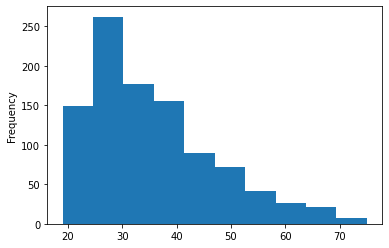

In [14]:
# Histograma 
df['Age'].plot.hist()

In [15]:
# Selección de filas en base a condición 
df.loc[df['Age'] > 35]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good,194.833333,True
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good,174.666667,True
3,45,male,1,for free,little,little,7882,42,radio/television,good,187.666667,True
4,53,male,1,for free,little,little,4870,24,car (new),bad,202.916667,True
6,53,male,1,own,quite rich,NaN,2835,24,radio/television,good,118.125000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,male,3,own,little,moderate,1743,24,domestic appliances,good,72.625000,True
990,37,male,3,own,NaN,NaN,3565,12,(vacation - does not exist?),good,297.083333,False
994,50,male,1,own,NaN,NaN,2390,12,car (new),good,199.166667,True
996,40,male,0,own,little,little,3857,30,car (used),good,128.566667,False


<AxesSubplot:xlabel='Age', ylabel='count'>

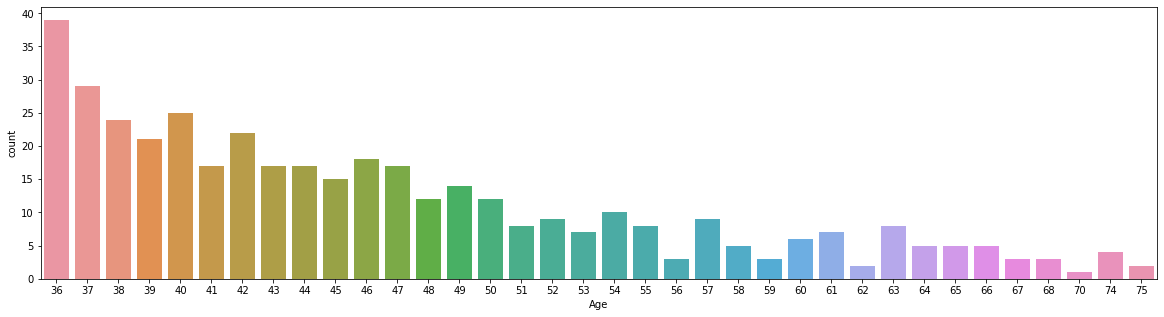

In [16]:
#Countplot por edad considerando el data frame condicionado
plt.figure(figsize=(20,5))
sns.countplot(data=df.loc[df['Age'] > 35], x='Age')

<AxesSubplot:ylabel='Age'>

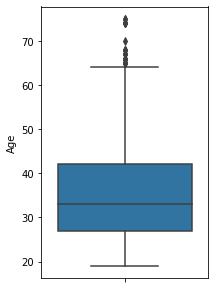

In [17]:
#Boxplot por edad
plt.figure(figsize=(3,5))
sns.boxplot(y = 'Age', data = df)

c:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


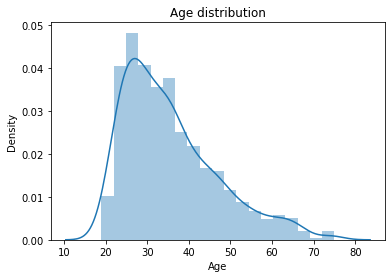

In [18]:
# Distribución de la edad
sns.distplot(df["Age"])
plt.title("Age distribution");

In [19]:
# Valores únicos de las variables categoricas
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [20]:
# Frecuencia de los valores de las variables categóricas
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

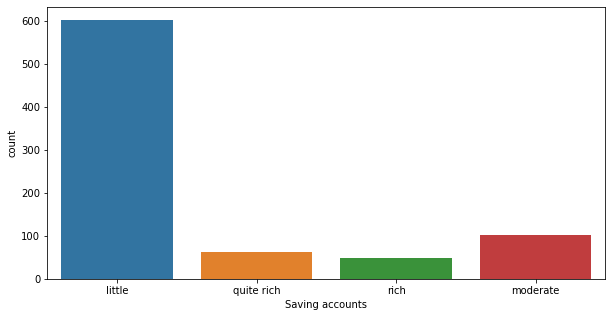

In [21]:
# Plot de frecuencia
plt.figure(figsize=(10,5))
chart = sns.countplot(data=df, x='Saving accounts')

In [ ]:
# Media
df["Age"].mean()

35.546

In [ ]:
# Mediana
df["Age"].median()

33.0

In [22]:
# Varianza
df["Age"].var()

129.40128528528504

In [ ]:
# Desviación estandar
df["Age"].std()

11.375468574317502

### Análisis bivariado

In [23]:
# Tabla de frecuencia cruzada
pd.crosstab(df['Saving accounts'], df.Risk)

Risk,bad,good
Saving accounts,,
little,217,386
moderate,34,69
quite rich,11,52
rich,6,42


In [ ]:
# Tabla de frecuencia normalizada, toda la tabla suma 1
pd.crosstab(df['Saving accounts'], df['Risk'], margins=True, normalize=True)

Risk,bad,good,All
Saving accounts,,,
little,0.265606,0.472460,0.738066
moderate,0.041616,0.084455,0.126071
quite rich,0.013464,0.063647,0.077111
rich,0.007344,0.051408,0.058752
All,0.328029,0.671971,1.000000


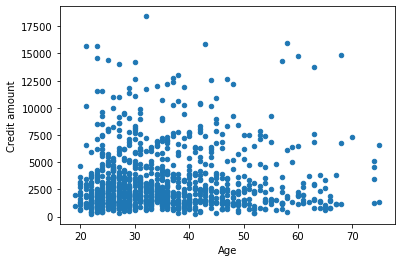

In [ ]:
# Scatter plot
df.plot.scatter(x='Age',y='Credit amount')

In [ ]:
# Media de edad agrupado por propósito
df.groupby('Purpose')['Age'].mean().sort_values(ascending=False)

Purpose
furniture/equipment             39.916667
(vacation - does not exist?)    38.940000
education                       38.545455
car (used)                      37.252427
car (new)                       37.089744
business                        35.484536
domestic appliances             34.700000
retraining                      34.666667
repairs                         34.250000
radio/television                32.458564
Name: Age, dtype: float64

In [ ]:
# Estadísticas de edad según propósito
df.groupby('Purpose')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Purpose,,,,,,,,
(vacation - does not exist?),50.0,38.940000,12.103988,23.0,30.25,36.0,48.50,67.0
business,97.0,35.484536,11.401858,21.0,27.00,33.0,39.00,74.0
car (new),234.0,37.089744,11.515452,20.0,28.00,35.0,43.00,75.0
car (used),103.0,37.252427,12.006304,20.0,28.00,35.0,44.00,75.0
domestic appliances,280.0,34.700000,11.142736,20.0,26.00,32.0,40.25,67.0
education,22.0,38.545455,14.879603,22.0,25.50,33.5,48.00,67.0
furniture/equipment,12.0,39.916667,11.325421,27.0,30.50,39.5,45.00,60.0
radio/television,181.0,32.458564,9.747632,19.0,25.00,30.0,39.00,63.0
repairs,12.0,34.250000,13.376540,22.0,24.00,28.0,39.50,62.0


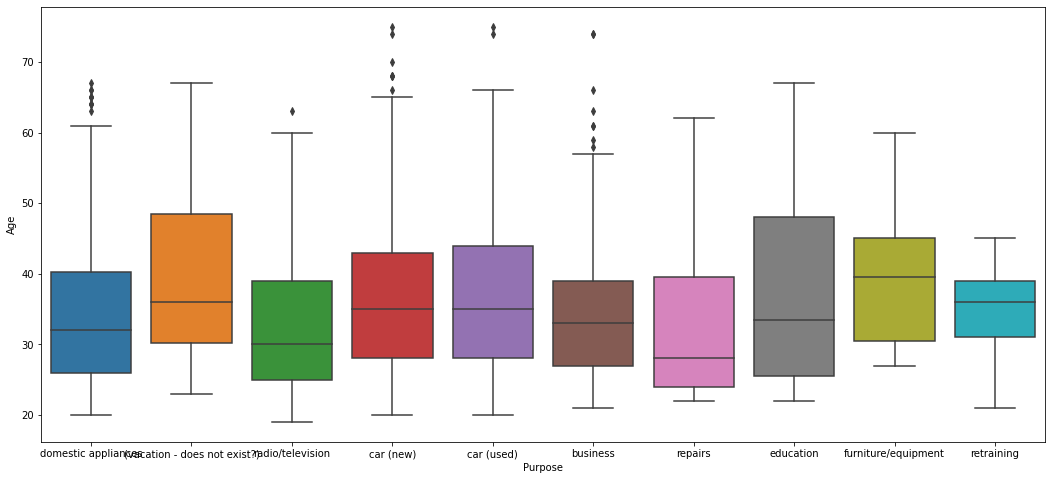

In [ ]:
# Boxplot de edad para cada propósito
plt.figure(figsize=(18,8))
sns.boxplot(y = 'Age', x = 'Purpose', data = df)

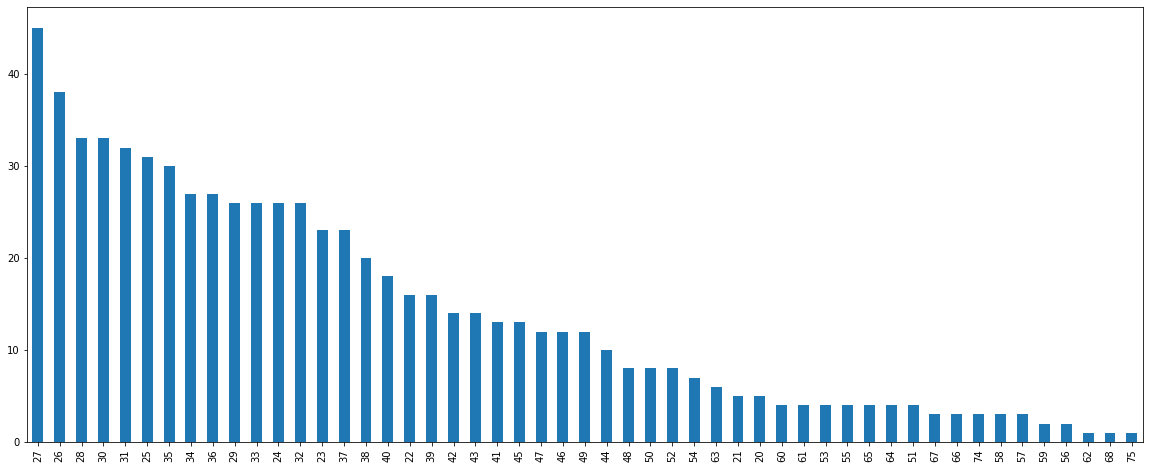

In [ ]:
# Plot de edad para los que tienen casa propia
plt.figure(figsize=(20,8))
chart = df[df['Housing'] == 'own']['Age'].value_counts().plot(kind='bar')

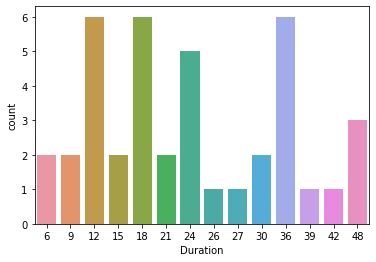

In [ ]:
# Plot de duración para los de edad 30 
sns.countplot(data=df[df['Age'] == 30], x='Duration')

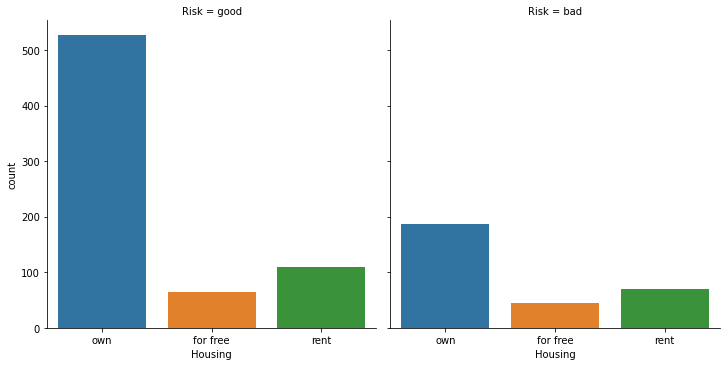

In [ ]:
# Plot de Housing según riesgo
sns.catplot(x="Housing", col="Risk",data= df,kind="count")

### Análisis multivariado

In [ ]:
# Cálculo media según housing
a=df.groupby('Housing').mean()
a

,Age,Credit amount,Duration,Credit per year,Older than 40
Housing,,,,,
for free,43.814815,4906.212963,27.453704,192.566092,0.546296
own,35.593268,3060.939691,20.328191,162.291174,0.262272
rent,30.368715,3122.553073,19.240223,174.169135,0.156425


In [ ]:
# Calculo mediana segun housing
b=df.groupby('Housing').median()
b

,Age,Credit amount,Duration,Credit per year,Older than 40
Housing,,,,,
for free,42.0,3800.5,24.0,146.906250,True
own,33.0,2238.0,18.0,125.500000,False
rent,26.0,2301.0,18.0,145.733333,False


In [ ]:
# Combinamos dos data frames
ab=pd.merge(a.Age,b.Age, how='inner',on='Housing')
ab

,Age_x,Age_y
Housing,,
for free,43.814815,42.0
own,35.593268,33.0
rent,30.368715,26.0


In [ ]:
# Renombramos variables
ab=ab.rename(columns={'Age_x': 'Age_mean', 'Age_y': 'Age_median'})
ab

,Age_mean,Age_median
Housing,,
for free,43.814815,42.0
own,35.593268,33.0
rent,30.368715,26.0


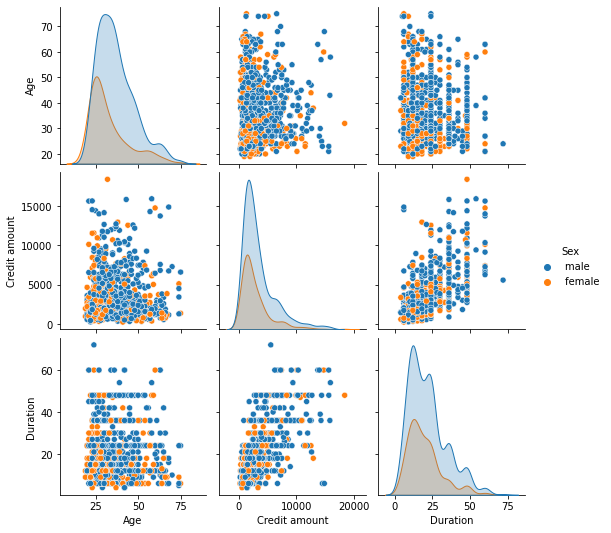

In [ ]:
# Pairplot 
sns.pairplot(df[['Age','Credit amount','Duration','Sex']], hue='Sex', height=2.5);

### Sampling

#### Simple random Sample

In [ ]:
# Con cantidad
df.sample(n=4, random_state=1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40,Duration2
507,34,male,0,own,moderate,moderate,6850,15,car (new),bad,456.666667,False,15
818,43,male,0,own,little,little,15857,36,furniture/equipment,good,440.472222,True,36
452,34,male,1,own,little,NaN,2759,12,radio/television,good,229.916667,False,12
368,42,male,1,own,little,little,3446,36,radio/television,bad,95.722222,True,36


In [ ]:
# Porcentual
df.sample(frac=0.01, random_state=1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40,Duration2
507,34,male,0,own,moderate,moderate,6850,15,car (new),bad,456.666667,False,15
818,43,male,0,own,little,little,15857,36,furniture/equipment,good,440.472222,True,36
452,34,male,1,own,little,NaN,2759,12,radio/television,good,229.916667,False,12
368,42,male,1,own,little,little,3446,36,radio/television,bad,95.722222,True,36
242,24,male,1,for free,little,little,4605,48,car (used),bad,95.937500,False,48
929,43,male,3,own,little,little,1344,12,car (new),good,112.000000,True,12
262,36,male,0,for free,little,little,5302,18,car (new),good,294.555556,False,18
810,26,male,1,own,little,moderate,907,8,business,good,113.375000,False,8
318,32,male,1,own,little,NaN,701,12,(vacation - does not exist?),good,58.416667,False,12
49,28,female,1,own,moderate,NaN,2073,12,domestic appliances,good,172.750000,False,12


#### Stratified Sample

In [ ]:
## Sampling con representación 2 de cada clase (2 es un N cualquiera)
df.groupby('Risk', group_keys=False).apply(lambda x: x.sample(min(len(x), 2)))

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40,Duration2
500,27,female,1,own,little,little,3123,24,car (new),bad,130.125000,False,24
180,28,male,1,own,little,NaN,9572,36,business,bad,265.888889,False,36
725,41,female,3,own,rich,NaN,250,6,car (new),good,41.666667,True,6
868,37,male,1,own,NaN,NaN,7409,36,business,good,205.805556,False,36


In [ ]:
# Sampling en base a ocurrencia de Risk, mantiene proporciones
# Agrupo por riesgo, para cada uno, aplico lambda expression
# La cantidad de samples por riesgo, está dado por su probabilidad de ocurrencia len(x)/len(df)
# Se representa proporcionalmente Risk en 3 ejemplos (3 es un N cualquiera)
# Uso round y no int porque int me recorta el decimal
df.groupby('Risk', group_keys=False).apply(lambda x: x.sample(round(3*len(x)/len(df))))

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit per year,Older than 40,Duration2
375,37,female,1,rent,little,little,7685,48,business,bad,160.104167,False,48
995,31,female,3,own,little,NaN,1736,12,radio/television,good,144.666667,False,12
461,36,male,1,own,little,little,1721,15,car (new),good,114.733333,False,15


### Outliers

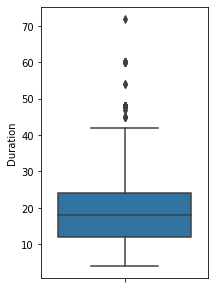

In [ ]:
#Boxplot por duración
plt.figure(figsize=(3,5))
sns.boxplot(y = 'Duration', data = df)

In [ ]:
# Winsorize para eliminar outliers de duración
df['Duration2'] = winsorize(df['Duration'], limits=[None, 0.05])

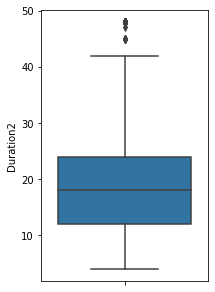

In [ ]:
#Boxplot por duración luego de winsorize
plt.figure(figsize=(3,5))
sns.boxplot(y = 'Duration2', data = df)

In [ ]:
df[['Duration','Duration2']].mean()

Duration     20.903
Duration2    20.711
dtype: float64

In [ ]:
df[['Duration','Duration2']].std()

Duration     12.058814
Duration2    11.508254
dtype: float64

In [ ]:
df[['Duration','Duration2']].max()

Duration     72
Duration2    48
dtype: int64

## Ejercicios

### Cargue el dataset houses_data.csv

In [24]:
#drive.mount('/content/drive', force_remount=True)

df_houses=pd.read_csv("practico1/houses_data.csv", sep = ",")

### ¿Cuantas observaciones tiene el dataset?


In [25]:
# Crear nuevo df seleccionando columnas bedrooms, bathrooms, square_footage_living, floors, waterfront, 
# condition, square_footage_above, square_footage_basement, year_built, year_renovated, price
new_df_houses = df_houses[['bedrooms', 'bathrooms', 'square_footage_living', 'floors', 'waterfront', 'condition', 'square_footage_above', 'square_footage_basement', 'year_built', 'year_renovated', 'price']].copy()

In [26]:
len(new_df_houses)

1031

### ¿Que campos tiene el dataset?

In [27]:
new_df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 1026 non-null   float64
 1   bathrooms                1026 non-null   float64
 2   square_footage_living    1016 non-null   float64
 3   floors                   1017 non-null   float64
 4   waterfront               1011 non-null   float64
 5   condition                1026 non-null   float64
 6   square_footage_above     1018 non-null   float64
 7   square_footage_basement  1021 non-null   float64
 8   year_built               1024 non-null   float64
 9   year_renovated           1024 non-null   float64
 10  price                    1031 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 88.7 KB


### Crear nuevo df seleccionando columnas bedrooms, bathrooms, square_footage_living, floors, waterfront, condition, square_footage_above, square_footage_basement, year_built, year_renovated, price

In [28]:
new_df_houses_2 = df_houses[['bedrooms', 'bathrooms', 'square_footage_living', 'floors', 'waterfront', 'condition', 'square_footage_above', 'square_footage_basement', 'year_built', 'year_renovated', 'price']].copy()
new_df_houses_2

,bedrooms,bathrooms,square_footage_living,floors,waterfront,condition,square_footage_above,square_footage_basement,year_built,year_renovated,price
0,3.0,1.00,1180.0,1.0,0.0,3.0,1180.0,0.0,1955.0,0.0,221900
1,3.0,2.25,2570.0,2.0,0.0,3.0,2170.0,400.0,1951.0,1991.0,538000
2,2.0,1.00,770.0,1.0,0.0,3.0,770.0,0.0,1933.0,0.0,180000
3,4.0,3.00,1960.0,1.0,0.0,5.0,1050.0,910.0,1965.0,0.0,604000
4,3.0,2.00,1680.0,1.0,0.0,3.0,1680.0,0.0,1987.0,0.0,510000
...,...,...,...,...,...,...,...,...,...,...,...
1026,3.0,2.50,1530.0,3.0,0.0,3.0,1530.0,0.0,2009.0,0.0,360000
1027,4.0,2.50,2310.0,2.0,0.0,3.0,2310.0,0.0,2014.0,0.0,400000
1028,2.0,0.75,1020.0,2.0,0.0,3.0,1020.0,0.0,2009.0,0.0,402101
1029,3.0,2.50,1600.0,2.0,0.0,3.0,1600.0,0.0,2004.0,0.0,400000


### Observar tipo de datos y realizar las modificaciones que crea adecuadas

In [29]:
new_df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 1026 non-null   float64
 1   bathrooms                1026 non-null   float64
 2   square_footage_living    1016 non-null   float64
 3   floors                   1017 non-null   float64
 4   waterfront               1011 non-null   float64
 5   condition                1026 non-null   float64
 6   square_footage_above     1018 non-null   float64
 7   square_footage_basement  1021 non-null   float64
 8   year_built               1024 non-null   float64
 9   year_renovated           1024 non-null   float64
 10  price                    1031 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 88.7 KB


In [30]:
df_aux = new_df_houses_2.isnull()
df_aux

,bedrooms,bathrooms,square_footage_living,floors,waterfront,condition,square_footage_above,square_footage_basement,year_built,year_renovated,price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1026,False,False,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False,False,False
1029,False,False,False,False,False,False,False,False,False,False,False


In [31]:
df_aux.any()

bedrooms                    True
bathrooms                   True
square_footage_living       True
floors                      True
waterfront                  True
condition                   True
square_footage_above        True
square_footage_basement     True
year_built                  True
year_renovated              True
price                      False
dtype: bool

In [32]:
df_aux.any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1026    False
1027    False
1028    False
1029    False
1030    False
Length: 1031, dtype: bool

## mostar solo las que tienen algún valor null

In [33]:
new_df_houses_2.loc[df_aux.any(axis=1)]#[['bedrooms']]

,bedrooms,bathrooms,square_footage_living,floors,waterfront,condition,square_footage_above,square_footage_basement,year_built,year_renovated,price
7,3.0,1.50,NaN,1.0,0.0,3.0,1060.0,0.0,1963.0,0.0,291850
15,4.0,3.00,2950.0,2.0,0.0,NaN,1980.0,970.0,1979.0,0.0,650000
17,4.0,1.00,1600.0,1.5,NaN,4.0,1600.0,0.0,1916.0,0.0,485000
21,3.0,2.75,3050.0,1.0,0.0,3.0,NaN,720.0,1968.0,0.0,2000000
46,3.0,1.00,990.0,1.0,NaN,3.0,NaN,0.0,1966.0,0.0,210490
...,...,...,...,...,...,...,...,...,...,...,...
929,4.0,3.00,2570.0,1.0,NaN,3.0,1420.0,1150.0,1988.0,0.0,390000
932,3.0,1.00,NaN,1.0,0.0,4.0,1250.0,0.0,1972.0,0.0,288349
1010,3.0,2.25,1190.0,NaN,0.0,3.0,1190.0,0.0,2008.0,0.0,475000
1014,5.0,2.75,3600.0,2.0,0.0,3.0,3600.0,NaN,2014.0,0.0,679950


<AxesSubplot:>

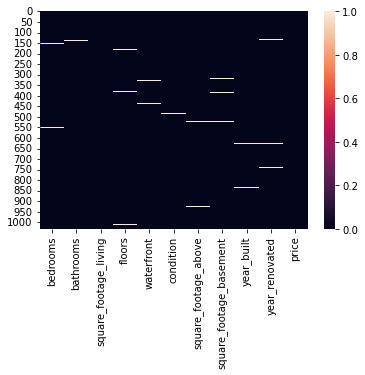

In [34]:
sns.heatmap(df_aux)

<AxesSubplot:ylabel='Frequency'>

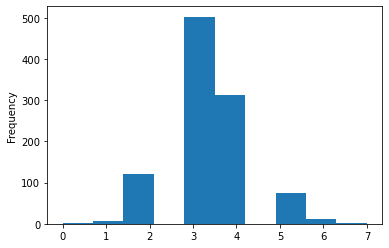

In [120]:
new_df_houses_2['bedrooms'].plot.hist()

In [121]:
new_df_houses_2['bedrooms'].median()


3.0

<AxesSubplot:ylabel='bedrooms'>

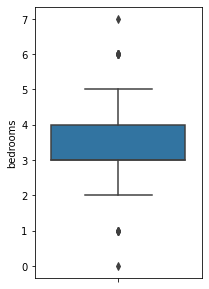

In [122]:
plt.figure(figsize=(3,5))
sns.boxplot(y = 'bedrooms', data = new_df_houses_2)

In [123]:
new_df_houses_2['bedrooms'].mean()


3.3511154219204657

In [103]:
new_df_houses_2['bedrooms_2'].mean()

3.3491755577109603

In [104]:
new_df_houses_2['bedrooms_3'].mean()

3.3511154219204657

In [87]:
new_df_houses_2['bedrooms_2'] = new_df_houses_2.bedrooms.fillna(new_df_houses_2.bedrooms.median())

In [91]:
new_df_houses_2['bedrooms_3'] = new_df_houses_2.bedrooms

In [97]:
new_df_houses_2.bedrooms_3 = new_df_houses_2.bedrooms_3.fillna(method = "ffill")

In [110]:
new_df_houses_2.drop('bedrooms_3', inplace=True, axis=1)

In [112]:
new_df_houses_2.drop('bedrooms_2', inplace=True, axis=1)

In [194]:
new_df_houses_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 1031 non-null   int64  
 1   bathrooms                1026 non-null   float64
 2   square_footage_living    1016 non-null   float64
 3   floors                   1017 non-null   float64
 4   waterfront               1011 non-null   float64
 5   condition                1026 non-null   float64
 6   square_footage_above     1018 non-null   float64
 7   square_footage_basement  1021 non-null   float64
 8   year_built               1024 non-null   float64
 9   year_renovated           1031 non-null   object 
 10  price                    1031 non-null   int64  
 11  was_renewed              1024 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 96.8+ KB


In [106]:
new_df_houses_2[new_df_houses_2.bedrooms_2.isnull()]

,bedrooms,bathrooms,square_footage_living,floors,waterfront,condition,square_footage_above,square_footage_basement,year_built,year_renovated,price,bedrooms_2,bedrooms_3


In [107]:
new_df_houses_2.bedrooms = new_df_houses_2.bedrooms_3
new_df_houses_2.bedrooms

0       3.0
1       3.0
2       2.0
3       4.0
4       3.0
       ... 
1026    3.0
1027    4.0
1028    2.0
1029    3.0
1030    2.0
Name: bedrooms, Length: 1031, dtype: float64

In [124]:
df_aux.mean()

bedrooms                   0.000000
bathrooms                  0.004850
square_footage_living      0.014549
floors                     0.013579
waterfront                 0.019399
condition                  0.004850
square_footage_above       0.012609
square_footage_basement    0.009699
year_built                 0.006790
year_renovated             0.006790
price                      0.000000
dtype: float64

In [129]:
new_df_houses_2.describe()

,bedrooms,bathrooms,square_footage_living,floors,waterfront,condition,square_footage_above,square_footage_basement,year_built,year_renovated,price
count,1031.000000,1026.000000,1016.000000,1017.000000,1011.000000,1026.000000,1018.000000,1021.000000,1024.000000,1024.000000,1.031000e+03
mean,3.351115,2.054581,2060.227362,1.459685,0.007913,3.452242,1763.495088,293.127326,1969.826172,77.880859,5.216541e+05
std,0.856101,0.721410,892.998533,0.524355,0.088646,0.683006,801.939049,446.539410,28.562994,386.479169,3.392391e+05
min,0.000000,0.000000,380.000000,1.000000,0.000000,1.000000,380.000000,0.000000,1900.000000,0.000000,8.000000e+04
25%,3.000000,1.562500,1410.000000,1.000000,0.000000,3.000000,1200.000000,0.000000,1952.000000,0.000000,3.100000e+05
50%,3.000000,2.000000,1910.000000,1.000000,0.000000,3.000000,1550.000000,0.000000,1975.000000,0.000000,4.350000e+05
75%,4.000000,2.500000,2482.500000,2.000000,0.000000,4.000000,2154.500000,560.000000,1993.000000,0.000000,6.314625e+05
max,7.000000,5.000000,6070.000000,3.500000,1.000000,5.000000,6070.000000,2060.000000,2015.000000,2014.000000,3.075000e+06


In [126]:
new_df_houses_2['bedrooms'] = new_df_houses_2['bedrooms'].astype('int64')

### Cree una nueva columna booleana llamada 'was_renewed' que indique true si y solo si la casa fue renovada en algún momento

In [133]:
new_df_houses_2['was_renewed'] = new_df_houses_2.year_renovated

In [142]:
new_df_houses_2.year_renovated = new_df_houses_2.year_renovated.fillna(False)

In [315]:
new_df_houses_2

,bedrooms,bathrooms,square_footage_living,floors,waterfront,condition,square_footage_above,square_footage_basement,year_built,year_renovated,price,was_renewed
0,3,1.00,1180.0,1.0,0.0,3.0,1180.0,0.0,1955.0,0.0,221900,False
1,3,2.25,2570.0,2.0,0.0,3.0,2170.0,400.0,1951.0,1991.0,538000,True
2,2,1.00,770.0,1.0,0.0,3.0,770.0,0.0,1933.0,0.0,180000,False
3,4,3.00,1960.0,1.0,0.0,5.0,1050.0,910.0,1965.0,0.0,604000,False
4,3,2.00,1680.0,1.0,0.0,3.0,1680.0,0.0,1987.0,0.0,510000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1026,3,2.50,1530.0,3.0,0.0,3.0,1530.0,0.0,2009.0,0.0,360000,False
1027,4,2.50,2310.0,2.0,0.0,3.0,2310.0,0.0,2014.0,0.0,400000,False
1028,2,0.75,1020.0,2.0,0.0,3.0,1020.0,0.0,2009.0,0.0,402101,False
1029,3,2.50,1600.0,2.0,0.0,3.0,1600.0,0.0,2004.0,0.0,400000,False


In [302]:
import math

In [311]:
def update_bat(bathrooms):
    return math.floor(bathrooms)

In [333]:
def update_bat(bathrooms):
    if bathrooms == 3:
        return "holaaaa"
    return math.floor(bathrooms)     

In [337]:
def update_ws(year_renovated):
    if year_renovated > 0:
        return "Verdadero"
    return "Falso"  

In [338]:
new_df_houses_2['was_renewed'].apply(update_ws)

0           Falso
1       Verdadero
2           Falso
3           Falso
4           Falso
          ...    
1026        Falso
1027        Falso
1028        Falso
1029        Falso
1030        Falso
Name: was_renewed, Length: 1031, dtype: object

In [332]:
new_df_houses_2['bathrooms'].apply(update_bat)

0             1
1             2
2             1
3       holaaaa
4             2
         ...   
1026          2
1027          2
1028          0
1029          2
1030          0
Name: bathrooms, Length: 1031, dtype: object

In [291]:
df20[filt]

C:\Users\crist\AppData\Local\Temp\ipykernel_3552\3833010912.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df20[filt]


,bedrooms,bathrooms,square_footage_living,floors,waterfront,condition,square_footage_above,square_footage_basement,year_built,year_renovated,price,was_renewed
1,3,2.25,2570.0,2.0,0.0,3.0,2170.0,400.0,1951.0,1991.0,538000,True
35,3,2.50,2300.0,1.5,0.0,3.0,1510.0,790.0,1930.0,2002.0,696000,True
103,3,2.50,2920.0,2.0,0.0,3.0,2920.0,0.0,1950.0,2010.0,1088000,True
115,3,3.50,4380.0,2.0,0.0,3.0,2780.0,1600.0,1900.0,1999.0,740500,True
158,3,2.00,1270.0,1.5,0.0,3.0,1270.0,0.0,1916.0,2013.0,247000,True
274,3,1.75,1080.0,1.0,0.0,3.0,580.0,500.0,1954.0,2003.0,331000,True
358,3,1.00,1330.0,1.0,0.0,3.0,1330.0,0.0,1928.0,1954.0,900000,True
379,3,1.50,1300.0,NaN,0.0,3.0,1300.0,0.0,1904.0,2014.0,435000,True
398,3,2.50,2160.0,1.5,0.0,3.0,1260.0,900.0,1909.0,2011.0,378750,True
586,3,2.50,2160.0,1.5,0.0,3.0,NaN,200.0,1903.0,2013.0,640000,True


In [313]:
new_df_houses_2.bathrooms = new_df_houses_2.bathrooms.fillna(method = "ffill")

In [262]:
new_df_houses_2[lambda x: x.was_renewed > 0]['was_renewed'].mean()

1993.75

In [269]:
filt = (new_df_houses_2['was_renewed'] > 0)


In [271]:
filt2 = (new_df_houses_2['was_renewed'] == 0)

In [278]:
filt3 = (new_df_houses_2['bedrooms'] == 3 )

In [267]:
new_df_houses_2.loc[filt,'was_renewed'] = True

In [272]:
new_df_houses_2.loc[filt2,'was_renewed'] = False

In [273]:
new_df_houses_2['was_renewed']

0       False
1        True
2       False
3       False
4       False
        ...  
1026    False
1027    False
1028    False
1029    False
1030    False
Name: was_renewed, Length: 1031, dtype: object

In [237]:
new_df_houses_2.was_renewed.replace(to_replace=1991, value= 'asd', regex=True)

0       0.0
1       asd
2       0.0
3       0.0
4       0.0
       ... 
1026    0.0
1027    0.0
1028    0.0
1029    0.0
1030    0.0
Name: was_renewed, Length: 1031, dtype: object

In [144]:
new_df_houses_2[new_df_houses_2.year_renovated > 0]

,bedrooms,bathrooms,square_footage_living,floors,waterfront,condition,square_footage_above,square_footage_basement,year_built,year_renovated,price,was_renewed
1,3,2.25,2570.0,2.0,0.0,3.0,2170.0,400.0,1951.0,1991.0,538000,1991.0
35,3,2.50,2300.0,1.5,0.0,3.0,1510.0,790.0,1930.0,2002.0,696000,2002.0
95,4,2.50,3300.0,1.0,0.0,3.0,2390.0,910.0,1946.0,1991.0,905000,1991.0
103,3,2.50,2920.0,2.0,0.0,3.0,2920.0,0.0,1950.0,2010.0,1088000,2010.0
115,3,3.50,4380.0,2.0,0.0,3.0,2780.0,1600.0,1900.0,1999.0,740500,1999.0
125,4,2.75,2750.0,1.5,0.0,3.0,1980.0,770.0,1914.0,1992.0,1450000,1992.0
158,3,2.00,1270.0,1.5,0.0,3.0,1270.0,0.0,1916.0,2013.0,247000,2013.0
209,6,3.00,2300.0,2.0,0.0,3.0,1600.0,700.0,1920.0,1994.0,464000,1994.0
216,5,3.00,3300.0,1.0,0.0,3.0,1870.0,1430.0,1957.0,1991.0,1505000,1991.0
230,2,1.75,1450.0,2.0,1.0,3.0,1230.0,220.0,1915.0,1978.0,655000,1978.0


### Grafique la distribución de bedrooms

C:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


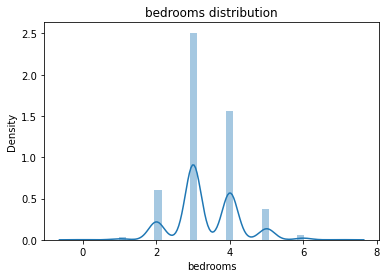

In [340]:
sns.distplot(new_df_houses_2["bedrooms"])
plt.title("bedrooms distribution");

### ¿Cuales son los valores de bedrooms y la frecuencia de cada uno?

In [341]:
new_df_houses_2['bedrooms'].unique()

array([3, 2, 4, 5, 1, 6, 7, 0], dtype=int64)

In [342]:
new_df_houses_2['bedrooms'].value_counts()

3    503
4    314
2    120
5     74
6     11
1      7
7      1
0      1
Name: bedrooms, dtype: int64

### Grafique mediante un boxplot price

<AxesSubplot:ylabel='price'>

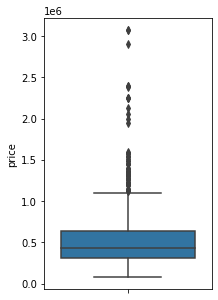

In [343]:
#Boxplot por edad
plt.figure(figsize=(3,5))
sns.boxplot(y = 'price', data = new_df_houses_2)

In [344]:
df = new_df_houses_2

In [349]:
df2 = new_df_houses_2

### ¿Cual es la media de price? ¿Qué pasa con la mediana, por qué? ¿Y la desviación estándar?

In [345]:
# Media
df["price"].mean()

521654.1416100873

In [353]:
# Media (despues)
df["price"].mean()

496813.33656644035

In [347]:
# Mediana
df["price"].median()

435000.0

In [354]:
# Mediana
df["price"].median()

435000.0

In [348]:
# Desviación estandar
df["price"].std()

339239.1113968948

In [357]:
# Desviación estandar (despues)
df["price"].std()

245244.2542642207

### Elimine los valores atípicos (outliers) de price considerando el 5% superior y vuelva a revisar la media, ¿se acerca a la mediana?

<AxesSubplot:ylabel='price'>

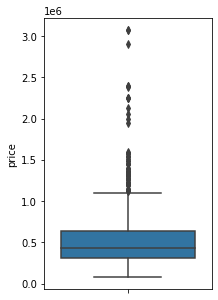

In [350]:
plt.figure(figsize=(3,5))
sns.boxplot(y = 'price', data = df)

In [351]:
# Winsorize para eliminar outliers de price

df['price'] = winsorize(df['price'], limits=[None, 0.05])

<AxesSubplot:ylabel='price'>

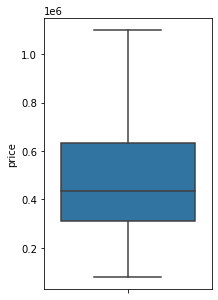

In [352]:
plt.figure(figsize=(3,5))
sns.boxplot(y = 'price', data = df)

### Gráfique mediante un scatter plot la relación entre bedrooms y bathrooms

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

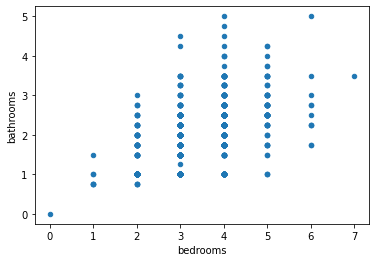

In [359]:
# Scatter plot
df.plot.scatter(x='bedrooms',y='bathrooms')

### ¿Cuantas casas renovadas tienen 3 bedrooms?
Puede ayudarse mediante una tabla de frecuencia 

In [365]:
filt_3 = (df['bedrooms'] == 3 )

In [367]:
filt_4 = (df['year_renovated'] > 0 )

In [376]:
# Tabla de frecuencia cruzada
pd.crosstab(df['bedrooms'][filt_3], df.year_renovated[filt_4], margins=True)

year_renovated,1954.0,1957.0,1977.0,1981.0,1988.0,1991.0,1995.0,1999.0,2002.0,2003.0,2010.0,2011.0,2013.0,2014.0,All
bedrooms,,,,,,,,,,,,,,,
3,1,1,1,1,1,1,1,1,2,1,1,1,2,1,16
All,1,1,1,1,1,1,1,1,2,1,1,1,2,1,16


### Calcule la media de bedrooms por was_renewed

### Realice un sampling de 250 ejemplos respetando la distribución de bedrooms

### Vuelva a graficar mediante boxplot el precio para el sampling anterior
Compare estos valores con el boxplot de los datos completos